# Experiment 11 

Train GASP models with phantom dataset (low and high tip angles)

In [1]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path

In [2]:
path = get_project_path()
M = dataset.load_dataset7a(path)

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


In [3]:
M = M[64:192, 64:192, : ,: ,:]
M.shape 

(128, 128, 8, 16, 3)

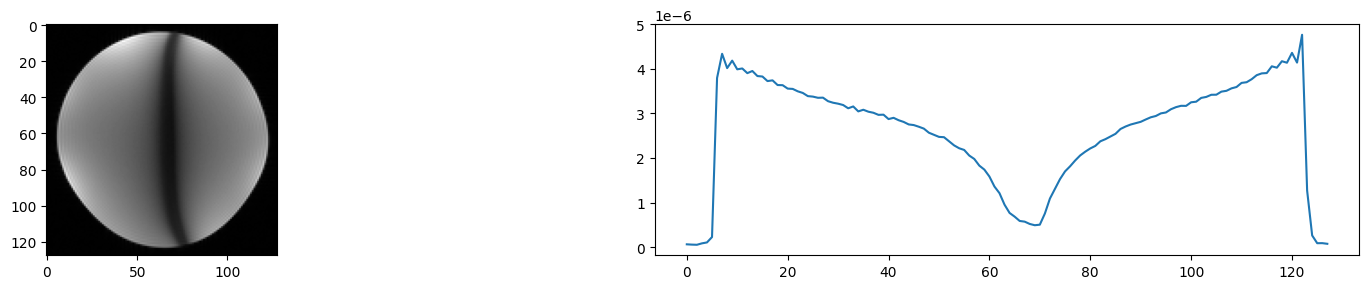

In [4]:
simulation.view_gasp_input(M, [10,0])

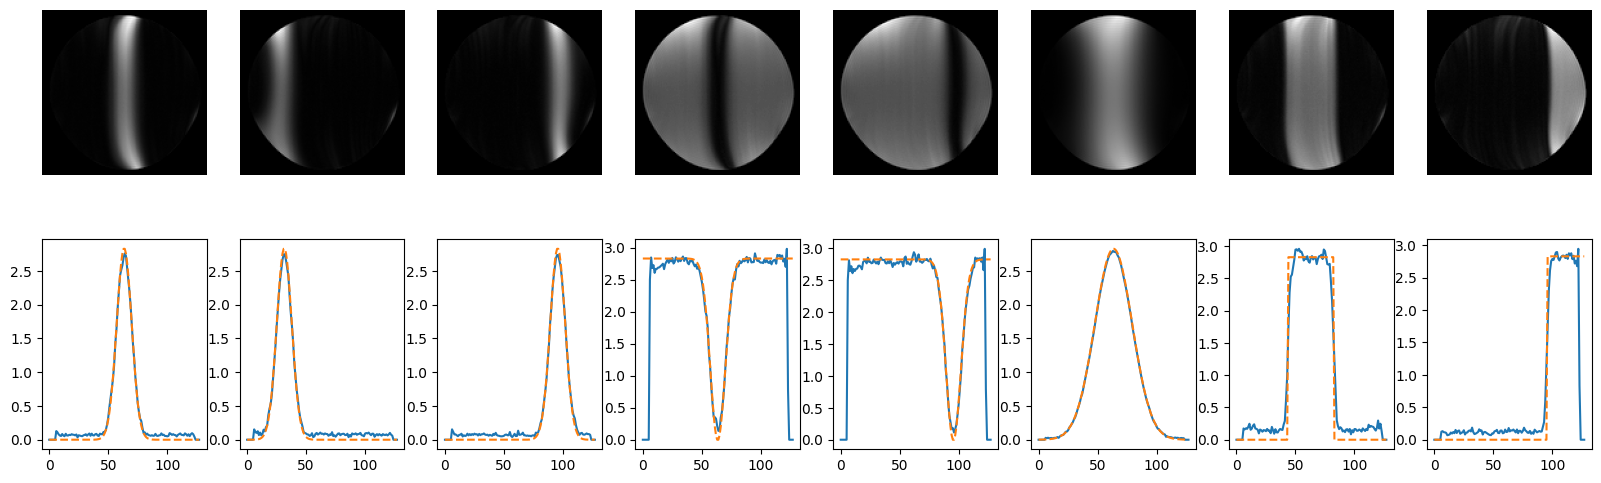

In [5]:
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.4))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

simulation.view_gasp_comparison(G, D)

In [6]:
M = dataset.load_dataset7b()

Downloading...
From (uriginal): https://drive.google.com/uc?id=11szQZR8MPmT09zaM-lCSc4nUlNC4E-el
From (redirected): https://drive.google.com/uc?id=11szQZR8MPmT09zaM-lCSc4nUlNC4E-el&confirm=t&uuid=5f07c595-6fcc-4732-b2b7-4eb1da83dbe7
To: /Users/michael/projects/imperial/GASP/notebooks/experiments/data/20231106_GASP_PHANTOM.zip
100%|██████████| 1.24G/1.24G [01:29<00:00, 13.9MB/s]


Download complete.
Extracting files ...
Extract complete.
Data located at: $/Users/michael/projects/imperial/GASP/notebooks/experiments/data/20231106_GASP_PHANTOM
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


In [7]:
M = M[64:192, 64:192, : ,: ,:]
M.shape 

(128, 128, 8, 16, 3)

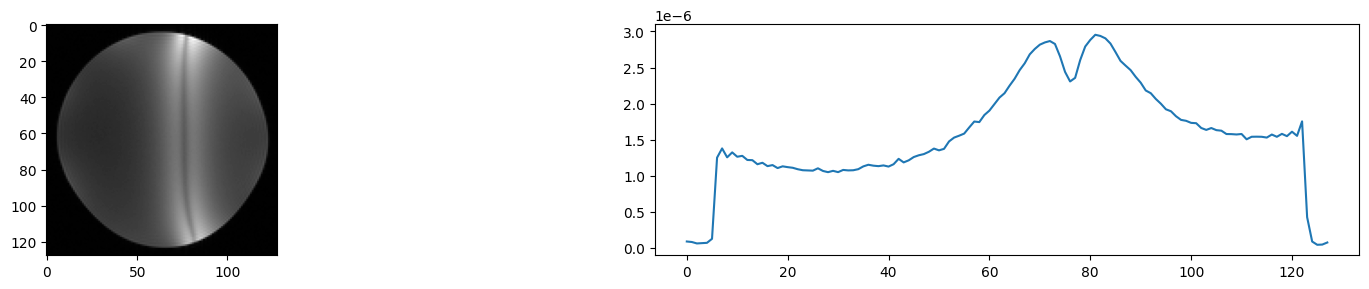

In [8]:
simulation.view_gasp_input(M, [10,0])

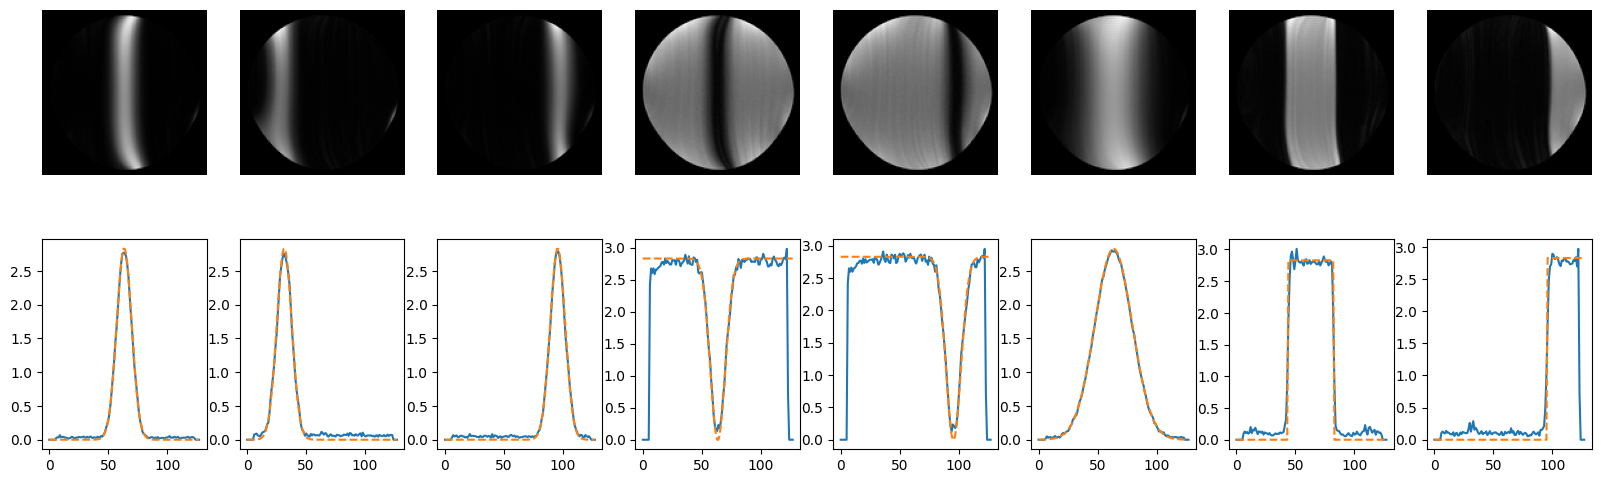

In [9]:
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.4))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

simulation.view_gasp_comparison(G, D)